In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load Dataset

In [2]:
work_dir = "../Klasifikasi-Bintang/Dataset/Classified_Stars"
Classified_Stars = os.listdir(work_dir)
Unclassified_Stars = os.listdir(work_dir)

data_tr = pd.read_csv(work_dir+'/'+Classified_Stars[1]) 
data_ts = pd.read_csv(work_dir+'/'+Classified_Stars[0])

data_cls = pd.concat([data_tr, data_ts], ignore_index=True)

#### Deskripsi Tentang Data
Klasifikasi Stellar menggunakan data spektral bintang untuk mengkategorikannya ke dalam kategori yang berbeda. Sistem klasifikasi bintang modern dikenal sebagai sistem klasifikasi Morgan–Keenan (MK). Ini menggunakan sistem klasifikasi HR (Hertzsprung-Russell) lama untuk mengkategorikan bintang dengan kromatisitasnya dan menggunakan angka Romawi untuk mengkategorikan ukuran bintang.
Dalam Kumpulan Data ini, kami akan menggunakan Magnitudo Mutlak dan Indeks Warna B-V (Selisih Intensitas Biru dan Visual) untuk Mengidentifikasi Raksasa (1) dan Kurcaci(0).

#### Penjelasan Fitur-Fitur Data
Vmag adalah Magnitudo Visual atau juga dikenal dengan magnitudo semu adalah suatu besaran yang menunjukkan kecerlangan suatu objek, namun pada parameter magnitudo semu ini, kecerlangan dari sebuah objek tersebut diukur oleh pengamat yang relatif dengan jarak pengamat. Sehingga pengamat yang memiliki jarak dengan objek yang diukur kecerlangannya memiliki magnitudo semu yang berbeda pula.

Plx dan e_Plx adalah suatu besaran yang sama yang merepresentasikan jarak bintang dari tata surya. Pada dasarnya Plx merupakan singkatan dari parallax yang merupakan parameter jarak yang diukur melalui fenomena yang dinamakan paralaks. Pengukuran dengan paralaks memiliki satuan parsek(paralaks sekon) dengan ukuran $1 pc = 3.086\times10^{16}$. Sedangkan e_Plx adalah error atau galat atau ketidakpastian dari pengukuran paralaks yang dicantumkan pada fitur Plx.

B-V adalah parameter yang menunjukkan indeks warna objek bintang. Parameter ini memiliki korelasi dengan temperatur suatu bintang. Sehingga indeks B-V dapat digunakan untuk mengetahui temperature suatu bintang. Semakin kecil indeks warnanya, semakin panas objeknya (semakin biru). B-V sendiri merupakan suatu operasi matematika yang berarti indeks biru dikurangi dengan indeks warna visualnya.

Amag adalah magnitudo absolut atau magnitudo mutlak dari bintang yang diamati. Perbedaannya dengan Vmag, parameter Amag ini merupakan besaran kecerlangan mutlak yang berarti tidak bergantung pada jarak pengamat. Besaran ini menunjukkan kecerlangan asli dari bintang yang diukur dengan cara membandingkannya dengan bintang yang menjadi acuan.

SpType adalah parameter yang menunjukkan tipe atau kelas dari bintang. Parameter ini mengandung klasifikasi MorganKeenan dan Yerkes. Dimana Abjad OBAFGKM menunjukkan klasifikasi berdasarkan warna dan temperaturnya sedangkan romawi menunujukkan klasifikasi MorganKeenan dalam 6 kelas.

# A. Analisis Eksplorasi Data

In [3]:
print(data_cls.info(), '\n')
data_cls.isnull().sum()
df1 = data_cls.copy()
print('\n', df1['SpType'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43194 entries, 0 to 43193
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         43194 non-null  float64
 1   Plx          43194 non-null  float64
 2   e_Plx        43194 non-null  float64
 3   B-V          43194 non-null  float64
 4   SpType       43194 non-null  object 
 5   Amag         43194 non-null  float64
 6   TargetClass  43194 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 2.3+ MB
None 


 K0III         3134
K1III         1942
K2III         1635
G8III         1609
K3III         1200
              ... 
A1Ia:p           1
F4Vw             1
K0V:+...         1
K0IV:            1
K0/1V (+K)       1
Name: SpType, Length: 2590, dtype: int64


#### Di sini, terdapat 6 fitur sebanyak 3642 baris dengan data yang terisi penuh tanpa ada data yang hilang. Dari semua parameter yang ditunjukkan hanya parameter SpType yang memiliki tipe data berupa objek atau kategorik. Selanjutnya digunakan fungsi value_counts() pada data 'SpType' untuk melihat seberapa banyak variasi tipe bintang yang mengisi parameter tersebut.

In [4]:
print(data_cls.head(10))

    Vmag    Plx  e_Plx    B-V SpType       Amag  TargetClass
0  10.00  31.66   6.19  1.213    K7V  22.502556            1
1   8.26   3.21   1.00  1.130  K0III  15.792525            0
2   8.27  12.75   1.06  0.596    F9V  18.797552            1
3   6.54   5.23   0.76  1.189  K1III  15.132508            0
4   8.52   0.96   0.72  0.173    B8V  13.431356            1
5   6.09   6.02   0.95  0.040  B8IVn  14.987983            1
6   7.94   5.36   0.61  1.066  K0III  16.585825            0
7   6.81  13.13   1.04  1.030  K1III  17.401323            0
8   7.68   0.66   0.62  0.013  B2V:e  11.777719            1
9   8.78   8.26   1.14  0.682   G2IV  18.364899            1


In [5]:
type_star = [name[0] for name in df1['SpType'].values]
np.unique(type_star)

array(['A', 'B', 'C', 'F', 'G', 'K', 'M', 'N', 'O', 'W'], dtype='<U1')

In [6]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df1['SpType'] = labelencoder.fit_transform(type_star)
df1['SpType'].value_counts()

5    13731
4     8781
3     8246
1     5396
0     4788
6     2082
8      113
2       53
9        3
7        1
Name: SpType, dtype: int64

#### Pada fitur SpType dilakukan proses encoding dengan metode label encoding. Hal itu dilakukan agar fitur SpType berubah menjadi data numerik, selain itu, teknik *label encoding* tidak membutuhkan kolom tambahan jika proses encoding dilakukan dengan *One Hot Encoding*.

In [7]:
print(df1.head(10), '\n')
df1.info()

    Vmag    Plx  e_Plx    B-V  SpType       Amag  TargetClass
0  10.00  31.66   6.19  1.213       5  22.502556            1
1   8.26   3.21   1.00  1.130       5  15.792525            0
2   8.27  12.75   1.06  0.596       3  18.797552            1
3   6.54   5.23   0.76  1.189       5  15.132508            0
4   8.52   0.96   0.72  0.173       1  13.431356            1
5   6.09   6.02   0.95  0.040       1  14.987983            1
6   7.94   5.36   0.61  1.066       5  16.585825            0
7   6.81  13.13   1.04  1.030       5  17.401323            0
8   7.68   0.66   0.62  0.013       1  11.777719            1
9   8.78   8.26   1.14  0.682       4  18.364899            1 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43194 entries, 0 to 43193
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Vmag         43194 non-null  float64
 1   Plx          43194 non-null  float64
 2   e_Plx        43194 non-null  float6

## Analisis Distribusi

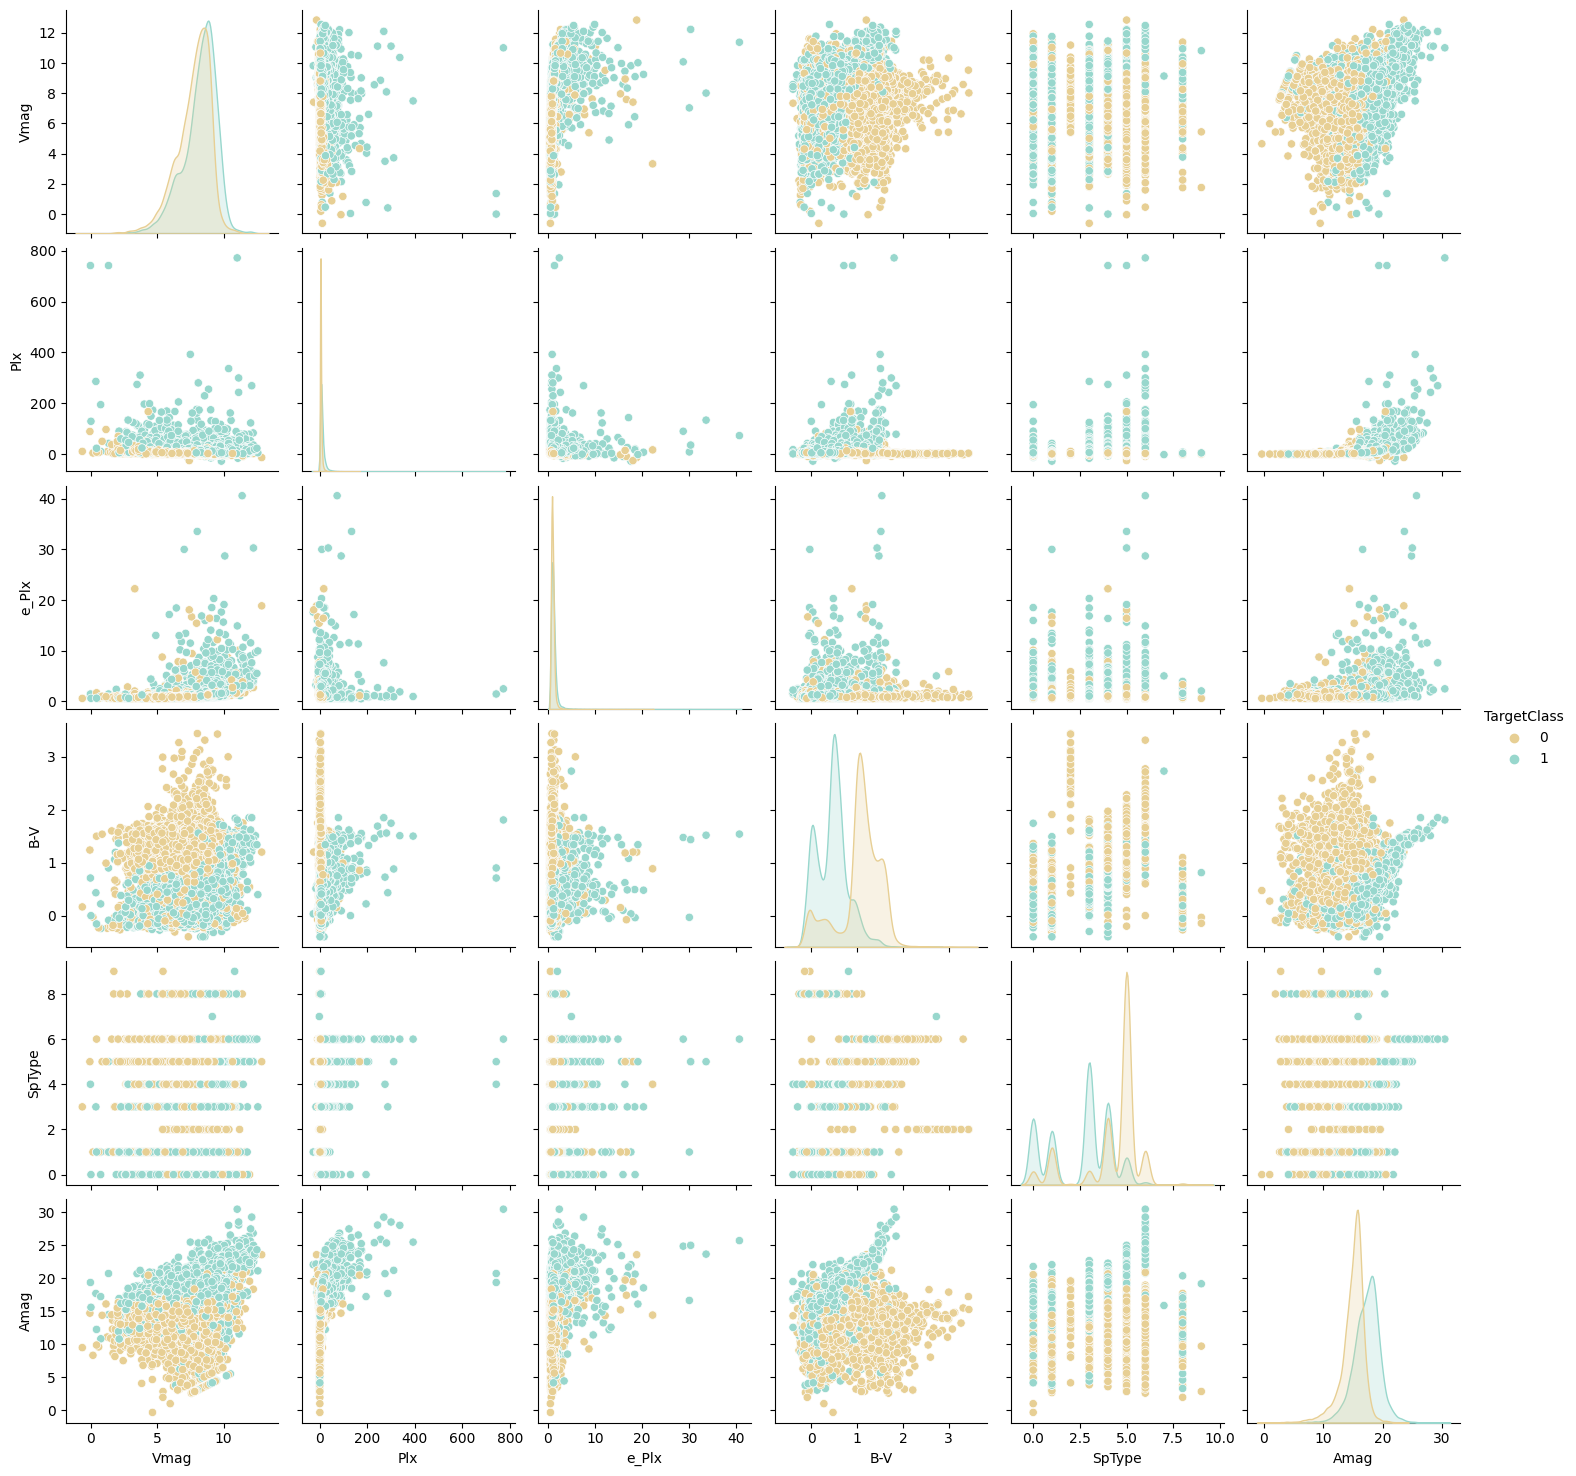

In [61]:
sns.pairplot(df1, hue = 'TargetClass', palette = 'BrBG')
plt.show()

#### Dapat dilihat dari plot di atas distribusi bintang kurcaci dan raksasa dari masing-masing plot antar variabel/parameter.

In [20]:
from scipy.stats import f_oneway

def annova(data, col_kategorik, col_fitur):
    fitur_cat = [data[data[col_kategorik] == i][col_fitur] for i in data[col_kategorik].unique()]
    f_value, p_value = f_oneway(fitur_cat[0], fitur_cat[1])
    return f_value, p_value


annova_oneway = [annova(df1, 'TargetClass', col)[-1] for col in df1.columns[:-1]]

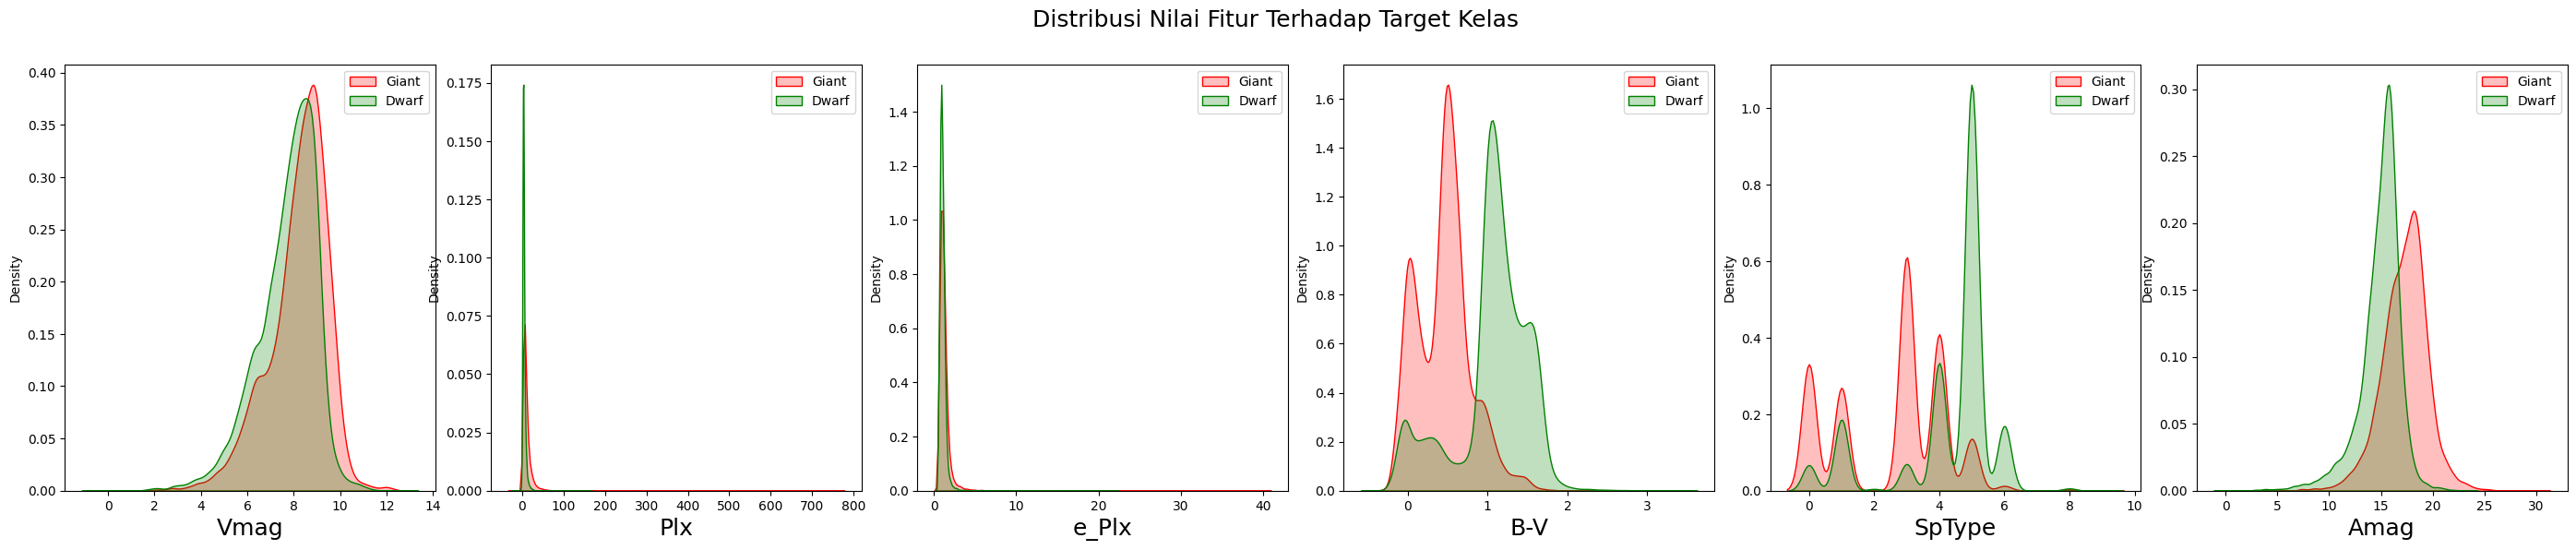

In [28]:
import seaborn as sns
fig, ax = plt.subplots(1, 6, figsize = (35, 6))
plt.subplots_adjust(wspace = 0.15)
plt.suptitle("Distribusi Nilai Fitur Terhadap Target Kelas", fontsize = 18)
for idx, col in enumerate(df1.columns[:-1]):
    sns.kdeplot(df1[df1["TargetClass"] == 1][col], ax = ax[idx], color='r', shade=True, label = 'Giant')
    sns.kdeplot(df1[df1["TargetClass"] == 0][col], ax = ax[idx], color='g', shade=True, label = 'Dwarf')
    
    ax[idx].legend()
    ax[idx].set_xlabel(col, fontsize = 18)

plt.show()

#### Dari visualisasi data di atas terlihat bahwa fitur yang memiliki faktor paling besar yang dapat merepresentasikan kedua kategori adalah fitur B-V, SpType, dan Amag.


## Analisis PCA

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def PCA_scaler(nilai_X, nilai_Y, title, gaya = 'default', scalling = 'Tidak', filename_path = '../Code Skripsi Ridho/out_file1/Visualisasi', simpan = 'tidak'):

    """
    Deskripsi
    Fungsi PCA_scaler bertugas untuk menampilkan hasil visualisasi data yang telah direduksi dengan PCA
    sekaligus memberikan informasi nilai varians tiap komponen fitur dalam data yang digunakan

    Parameter Input
    nilai_X       : Kolom dari jenis fitur spektral
    nilai_Y       : Nilai fitur spektral
    title         : Judul untuk grafik
    gaya          : gaya untuk visualisasi mengikuti gaya matplotlib
    scalling      : 'Ya' atau 'Tidak' untuk memilih apakah data ingin dinormalisasi
    filename_path : path untuk menyimpan file gambar dari grafik
    simpan        : 'Ya' atau 'Tidak' untuk opsi menyimpan file hasil visualisasi

    Output
    X_pca                    : mengembalikan nilai transformasi PCA
    X_scaled                 : mengembalikan nilai yang telah direscale
    explained_variance       : Nilai varians asli tiap komponen
    explained_variance_ratio : Nilai varians dalam bentuk persentase tiap komponen
    """

    if scalling.lower() == 'ya':
      scaler = StandardScaler()
      X_scaled = scaler.fit_transform(nilai_X)
    if scalling.lower() == 'tidak':
      X_scaled = nilai_X

    # Melakukan PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    explained_variance = pca.explained_variance_
    explained_variance_ratio = pca.explained_variance_ratio_
    class_ = np.unique(nilai_Y)
    print("Nilai Varians: \n", explained_variance)
    print("Nilai Varians: \n", explained_variance_ratio)

    # Plot hasil PCA
    plt.figure(figsize=(8, 6))
    for idx, val in enumerate(class_):

        plt.scatter(X_pca[nilai_Y == val, 0], X_pca[nilai_Y == val, 1], label='Class ' + val)

    plt.xlabel('Principal Component 1', fontsize = 13)
    plt.ylabel('Principal Component 2', fontsize = 13)
    plt.style.use(gaya)
    legend = plt.legend(fontsize = 13)
    legend.get_frame().set_alpha(0.2)
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=13)
    plt.legend()
    if simpan.lower() == 'ya':
      plt.savefig(filename_path)
    if simpan.lower() == 'tidak':
      pass
    plt.show()

    return X_pca, X_scaled, explained_variance, explained_variance_ratio

Nilai Varians: 
 [5.99725007 3.48547323]
Nilai Varians: 
 [0.62863251 0.36534774]


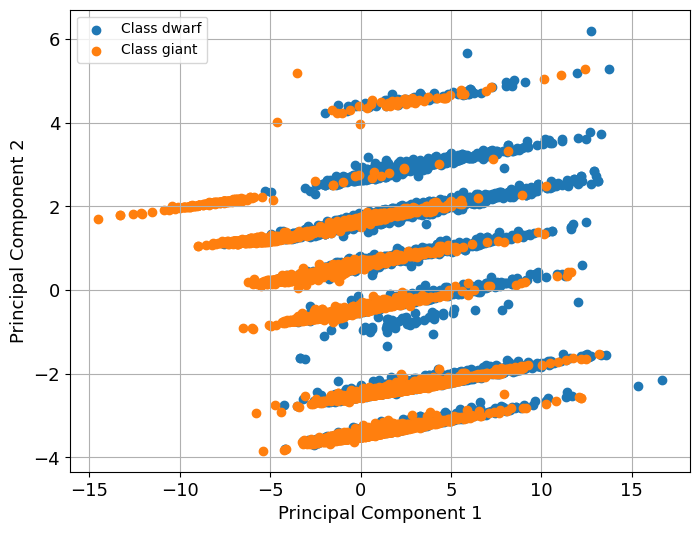

In [59]:
pca = PCA_scaler(df1.iloc[:, 3:6].values, np.array(['dwarf' if el == 0 else 'giant' for el in df1['TargetClass']]), 'Differensial Intensitas Orde 1',
                gaya = 'default', scalling = 'Tidak', simpan = 'Tidak',
                filename_path = '../Code Skripsi Ridho/out_file2/Visualisasi/rev_PCA_It_prefilter.png')


# B. Membangun model klasifikasi dengan Regresi Logistik dan KNN serta membandingkan hasilnya

## 1. Regresi Logistik

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [64]:
X = df1[['Vmag', 'Plx', 'e_Plx', 'B-V', 'SpType', 'Amag']].copy()
Y = df1[['TargetClass']].copy()

print(X[:5])
print('\n', Y[:5])

    Vmag    Plx  e_Plx    B-V  SpType       Amag
0  10.00  31.66   6.19  1.213       5  22.502556
1   8.26   3.21   1.00  1.130       5  15.792525
2   8.27  12.75   1.06  0.596       3  18.797552
3   6.54   5.23   0.76  1.189       5  15.132508
4   8.52   0.96   0.72  0.173       1  13.431356

    TargetClass
0            1
1            0
2            1
3            0
4            1


In [65]:
X_tr, x_tst, Y_tr, y_tst = train_test_split(X, Y, train_size = 0.8)
X_train, x_test, Y_train, y_test = np.array(X_tr), np.array(x_tst), np.array(Y_tr), np.array(y_tst)

In [70]:
LR = LogisticRegression(multi_class='auto')
LR.fit(X_train, Y_train.flatten())

LogisticRegression()

#### Model Logistik Regresi dilakukan untuk mengklasifikasi data, sebab label atau target yang dituju bersifat diskrit dan biner. Meskipun begitu, dalam hal ini status multi_class yang dipilih bersifat auto agar algoritma dapat menyesuaikan dengan jumlah kelas yang ada.

In [72]:
#data_test = x_test.append(y_test)
data_test = x_tst.copy()
data_test['TargetClass'] = y_tst.copy()
print(data_test[:15])

       Vmag    Plx  e_Plx    B-V  SpType       Amag  TargetClass
31572  9.77   6.94   1.51  0.657       4  18.976799            1
27533  8.06   4.09   0.71 -0.051       1  16.118618            1
29582  9.21   1.27   1.37  1.461       5  14.729019            0
31334  7.70   2.18   1.04  1.027       4  14.392283            0
30434  4.56   3.15   0.69 -0.147       1  12.051553            1
6254   8.00   2.51   1.20  0.249       1  14.998368            1
4640   5.56  61.54   1.05  0.624       4  19.505787            1
18063  7.55   6.28   0.82  0.330       3  16.539799            1
36210  8.76   2.05   1.27  1.743       6  15.318769            0
36373  7.07   1.19   0.90  1.780       6  12.447735            0
5014   8.86   7.56   1.47  0.380       3  18.252610            1
18973  6.40   6.78   0.68 -0.005       1  15.556149            1
8500   7.99   4.28   1.08 -0.045       1  16.147219            1
30949  6.08   4.33   0.76  1.556       6  14.262440            0
30319  8.88   1.82   1.20

In [74]:
probabilitas_pred = LR.predict_proba(x_test)[0:15]
probabilitas_pred

array([[1.03105544e-01, 8.96894456e-01],
       [7.22826155e-02, 9.27717384e-01],
       [9.70156305e-01, 2.98436949e-02],
       [9.34538905e-01, 6.54610948e-02],
       [6.47770776e-01, 3.52229224e-01],
       [2.98022038e-01, 7.01977962e-01],
       [7.60531162e-04, 9.99239469e-01],
       [2.33601961e-01, 7.66398039e-01],
       [9.89014429e-01, 1.09855714e-02],
       [9.98845686e-01, 1.15431377e-03],
       [7.08831323e-02, 9.29116868e-01],
       [1.61216041e-01, 8.38783959e-01],
       [7.14458176e-02, 9.28554182e-01],
       [9.95426127e-01, 4.57387288e-03],
       [8.17749689e-01, 1.82250311e-01]])

#### Dari hasil prediksi probabilitas yang ditampilkan di atas, sisi kiri adalah probabilitas terpilihnya kelas 0 atau dwarf dan sisi kanan probabilitas terpilihnya kelas 1 atau giant.

In [75]:
hasil_pred = LR.predict(x_test)
hasil_pred[:15]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

## 2. KNN (K Nearest Neighbors)

In [76]:
from sklearn.neighbors import KNeighborsClassifier 

In [96]:
KNN = KNeighborsClassifier(n_neighbors = 5, weights = 'distance', metric = 'euclidean')
KNN.fit(X_train, Y_train.flatten())

KNeighborsClassifier(metric='euclidean', weights='distance')

#### Jumlah neighbors atau tetangga yang dipilih dalam model di atas adalah 5 buah, sebab ukuran tersebut dirasa tidak terlalu sedikit maupun terlalu banyak. Sedangkan weight yang dipilih adalah jarak yang digunakan sebagai faktor pengambil keputusan untuk menentukan data tersebut berada dalam kelas tertentu, dan metric yang digunakan adalah euclidian untuk menghitung jarak antar datanya.

In [97]:
KNN_pred = KNN.predict(x_test)
print(KNN_pred[:15])

[1 1 0 0 1 1 1 1 0 0 1 1 1 0 1]


## 3. Decision Tree 

In [80]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz

In [92]:
DT = DecisionTreeClassifier(criterion = 'entropy', random_state= 100, max_depth=5, min_samples_leaf=10)
DT.fit(X_train, Y_train)
DT_pred =  DT.predict(x_test)


#### kriteria yang digunakan dalam model Decision tree adalah entropy dengan algoritma ID3, random state yang dipilih sebesar 100 kali untuk mengacak proses split sebelum menemukan split terbaik. Kemudian Max depth yang dipilih sebesar 5 yang berarti kedalaman maksimum pohon adalah 5. Jika tidak di inisialisasi maka node diperluas sampai mencapai tingkat entropi yang paling rendah atau mencapai kemurnian yang tinggi. Min sample leaf yang digunakan adalah 10 yang berarti jumlah minimum sampel yang diperlukan untuk berada di node daun berjumlah 10.

In [93]:
print(DT_pred[:15])

[1 1 0 0 1 0 1 1 0 0 1 1 1 0 0]


In [94]:
alur_keputusan = tree.export_text(DT)
print(alur_keputusan)

|--- feature_3 <= 0.88
|   |--- feature_5 <= 15.70
|   |   |--- feature_3 <= 0.23
|   |   |   |--- feature_5 <= 13.95
|   |   |   |   |--- feature_5 <= 11.38
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  11.38
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_5 >  13.95
|   |   |   |   |--- feature_4 <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_4 >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- feature_3 >  0.23
|   |   |   |--- feature_0 <= 8.86
|   |   |   |   |--- feature_5 <= 13.90
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_5 >  13.90
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  8.86
|   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_4 >  2.50
|   |   |   |   |   |--- class: 1
|   |--- feature_5 >  15.70
|   |   |--- feature_5 <= 17.58
|   |   |   |--- feature_3 <= 0.72
|   |   |   |   |--- feature_3 <= 0.14
|   |   |   |   |   |--

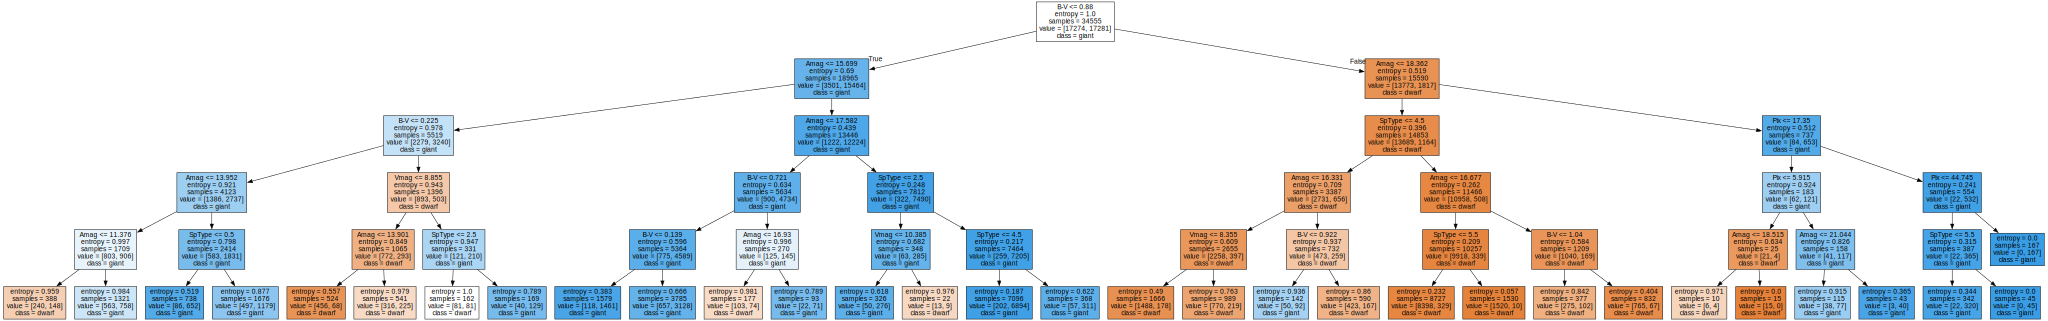

In [95]:
import graphviz
dot_data = tree.export_graphviz(DT, out_file=None, 
                                feature_names=['Vmag', 'Plx', 'e_Plx', 'B-V',  'SpType', 'Amag'],  
                                class_names= ['dwarf', 'giant'],
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
#graphviz.Source(dot_data, format="png") 
graph

## 4. XG-Boost

In [101]:
import xgboost as xgb
from xgboost import plot_tree

In [99]:
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [100]:
XGB_pred =  xgb_model.predict(x_test)

In [106]:
print(XGB_pred[:15])

[1 1 0 0 1 0 1 1 0 0 1 1 1 0 0]


# C. Evaluasi Model

## 1. Regresi Logistik

              precision    recall  f1-score   support

           0       0.93      0.88      0.91       391
           1       0.87      0.93      0.90       338

    accuracy                           0.90       729
   macro avg       0.90      0.91      0.90       729
weighted avg       0.91      0.90      0.90       729


Confusion Matrix Regresi Logistik
 [[346  45]
 [ 25 313]] 




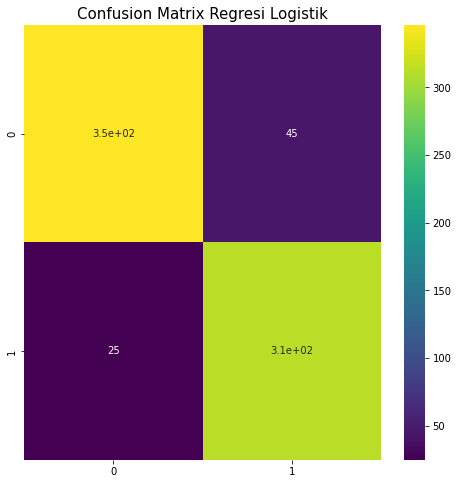

In [24]:
print(metrics.classification_report(y_test, hasil_pred))
print("\nConfusion Matrix Regresi Logistik\n", metrics.confusion_matrix(y_test, hasil_pred), '\n\n')

plt.figure(figsize = (8, 8))
plt.title("Confusion Matrix Regresi Logistik", fontsize = 15)
dataplot = sns.heatmap(metrics.confusion_matrix(y_test, hasil_pred), cmap="viridis", annot=True)

plt.show()

## 2. KNN

In [25]:
print(metrics.classification_report(y_test, KNN_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       391
           1       0.93      0.95      0.94       338

    accuracy                           0.94       729
   macro avg       0.94      0.94      0.94       729
weighted avg       0.94      0.94      0.94       729




Confusion Matrix K-Nearest Neighbors
 [[365  26]
 [ 17 321]] 




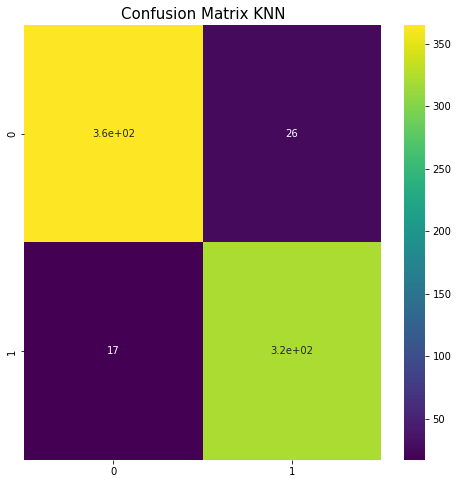

In [26]:
KNN_confmatrix =  metrics.confusion_matrix(y_test, KNN_pred)
print("\nConfusion Matrix K-Nearest Neighbors\n", KNN_confmatrix, '\n\n')

plt.figure(figsize = (8, 8))
plt.title("Confusion Matrix KNN", fontsize = 15)
dataplot = sns.heatmap(KNN_confmatrix, cmap="viridis", annot=True)

plt.show()

## 3. Decision Tree

In [27]:
print(metrics.classification_report(y_test, DT_pred))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       391
           1       0.89      0.91      0.90       338

    accuracy                           0.91       729
   macro avg       0.91      0.91      0.91       729
weighted avg       0.91      0.91      0.91       729




Confusion Matrix Decision Tree
 [[354  37]
 [ 29 309]] 




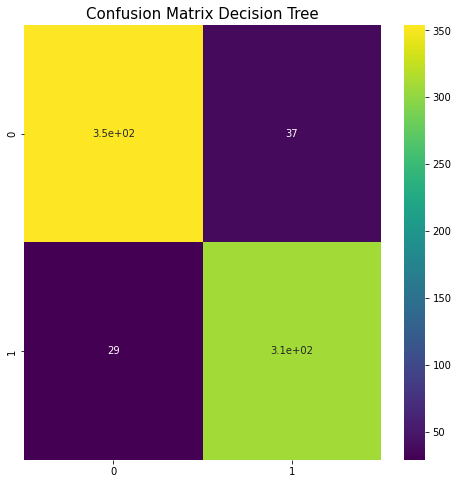

In [28]:
DT_confmatrix =  metrics.confusion_matrix(y_test, DT_pred)
print("\nConfusion Matrix Decision Tree\n", DT_confmatrix, '\n\n')

plt.figure(figsize = (8, 8))
plt.title("Confusion Matrix Decision Tree", fontsize = 15)
dataplot = sns.heatmap(DT_confmatrix, cmap="viridis", annot=True)

plt.show()

## 4. XG-Boost

In [107]:
print(metrics.classification_report(y_test, XGB_pred))

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      4323
           1       0.88      0.91      0.89      4316

    accuracy                           0.89      8639
   macro avg       0.89      0.89      0.89      8639
weighted avg       0.89      0.89      0.89      8639




Confusion Matrix Decision Tree
 [[3779  544]
 [ 399 3917]] 




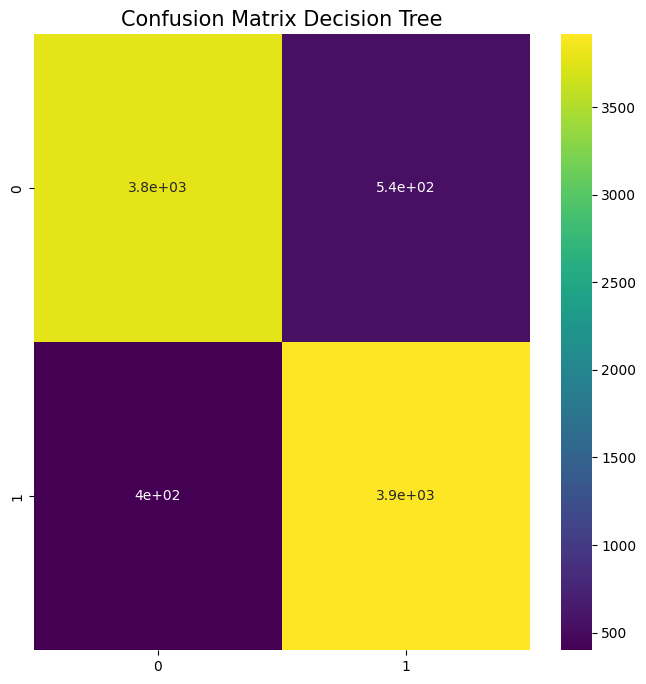

In [108]:
XGB_confmatrix =  metrics.confusion_matrix(y_test, XGB_pred)
print("\nConfusion Matrix Decision Tree\n", XGB_confmatrix, '\n\n')

plt.figure(figsize = (8, 8))
plt.title("Confusion Matrix Decision Tree", fontsize = 15)
dataplot = sns.heatmap(XGB_confmatrix, cmap="viridis", annot=True)

plt.show()

# D. Kesimpulan

##### Dari beberapa algoritma yang digunakan akurasi tertinggi diperoleh dari algoritma KNN diikuti dengan decision tree kemudian yang terakhir regresi logistik. Namun, meski begitu di beberapa kesempatan algoritma Decision Tree lebih sering memiliki akurasi yang lebih baik dibanding algoritma KNN.  Sedangkan dari analisis korelasi diperoleh bahwa urutan parameter yang memiliki korelasi paling tinggi yang dapat mengindikasikan suatu bintang masuk ke dalam kategori giant(1) atau dwarf(0) adalah sebagai berikut : 
1. Indeks warna Selisih Biru dan Visual (B-V) (-0.62)
2. Magnitudo Mutlak (Amag) (0.58)
3. SpType (0.34)
4. Jarak dalam satuan Parallax (Plx) (0.29)
5. Magnitudo Visual (Vmag) (0.26)
6. Ketidakpastian jarak (e_Plx) (0.17)

##### Tanda negatif pada parameter B-V hanya menunjukkan bahwa korelasi parameter B-V dengan target kelas bintang bernilai negatif atau berbanding terbalik, namun meski begitu korelasi berbanding terbaliknya lebih besar dibanding yang lain. Sehingga urutannya tidak bergantung pada tanda. Klasifikasi bintang yang lebih spesifik sebenarnya dapat mengacu pada diagram HR. Dimana diagram tersebut mengklasifikasi bintang berdasarkan 4 parameter yakni Indeks B-V, Magnitudo mutlak, Tipe Spektral (SpType), dan Lumonisitas. Hal tersebut menunjukkan bahwa 3 dari 4 parameter yang ada pada klasifikasi Hertzsprung-Russell(HR) memiliki korelasi paling tinggi di antara variabel lainnya dalam mengklasifikasikan bintang dalam kelas giant(1) dan dwarf(0).